In [3]:
import glob
from kraken.lib.train import KrakenTrainer
from kraken.lib import xml, dataset

ground_truth = glob.glob(
    '/home/space/datasets/workshop-dh-ml/improve-ocr/data/Rodich_1876_-_2/page/*.xml'
)

In [4]:
sample_file = ground_truth[0]
xml.parse_page(sample_file)

{'image': 'data/Rodich_1876_-_2/page/0120_Rodich 1876 - 2-0120.jpg',
 'lines': [{'baseline': [(810, 375),
    (838, 374),
    (866, 371),
    (895, 369),
    (923, 368),
    (951, 366),
    (980, 366),
    (1008, 364),
    (1036, 363),
    (1065, 362),
    (1093, 362),
    (1121, 360),
    (1150, 359),
    (1178, 357),
    (1206, 356),
    (1235, 354),
    (1263, 351),
    (1291, 349),
    (1320, 345),
    (1348, 341),
    (1377, 338)],
   'boundary': [(796, 388),
    (1165, 372),
    (1275, 344),
    (1325, 361),
    (1391, 332),
    (1388, 281),
    (1341, 303),
    (1210, 307),
    (1157, 272),
    (1108, 327),
    (898, 308),
    (794, 341)],
   'text': '2. Märo 18716',
   'script': 'default'},
  {'baseline': [(323, 456),
    (430, 462),
    (538, 465),
    (645, 465),
    (753, 462),
    (861, 458),
    (968, 451),
    (1076, 443),
    (1183, 434),
    (1291, 425),
    (1399, 416),
    (1506, 409),
    (1614, 401),
    (1721, 396),
    (1829, 393),
    (1937, 392),
    (2044, 393)

In [5]:
import pandas as pd
data_pairs = dataset.preparse_xml_data([sample_file])
pd.DataFrame(data_pairs).head()

,image,baseline,boundary,text,script
0,data/Rodich_1876_-_2/page/0120_Rodich 1876 - 2...,"[(810, 375), (838, 374), (866, 371), (895, 369...","[(796, 388), (1165, 372), (1275, 344), (1325, ...",2. Märo 18716,default
1,data/Rodich_1876_-_2/page/0120_Rodich 1876 - 2...,"[(323, 456), (430, 462), (538, 465), (645, 465...","[(311, 486), (1391, 469), (1638, 400), (2490, ...",Auch gestern Abends eingeome Brjonia Mauer - h...,default
2,data/Rodich_1876_-_2/page/0120_Rodich 1876 - 2...,"[(323, 527), (430, 533), (538, 537), (645, 537...","[(310, 580), (1020, 520), (1168, 571), (1781, ...",Herppflasen auf das richte Schulterblatt u die...,default
3,data/Rodich_1876_-_2/page/0120_Rodich 1876 - 2...,"[(323, 597), (426, 602), (529, 605), (633, 606...","[(310, 629), (797, 602), (878, 653), (1562, 56...","nehren Tagen empfindenden Druck, den ich offen...",default
4,data/Rodich_1876_-_2/page/0120_Rodich 1876 - 2...,"[(2360, 635), (2388, 643), (2417, 645), (2445,...","[(2346, 673), (2376, 672), (2398, 661), (2414,...","gehe, Se",default


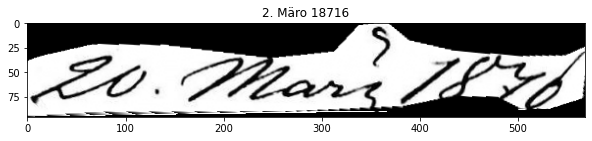

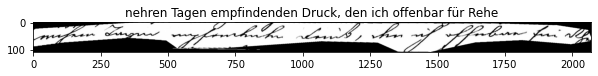

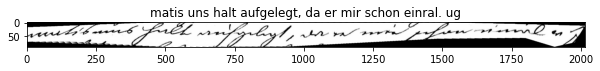

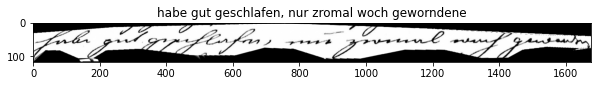

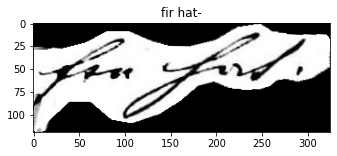

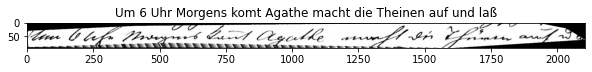

In [8]:
import matplotlib.pyplot as plt
from kraken.lib import segmentation
from PIL import Image
from kraken.lib.exceptions import KrakenInputException

for irow, row in enumerate(data_pairs):
    if irow>10:
        break
    image = Image.open(row['image'])
    bounds = {
        'type': 'baselines',
        'lines': [{'baseline': row['baseline'], 'boundary': row['boundary']}]
    }
    try:
        polygon = next(segmentation.extract_polygons(image, bounds))

        fig, ax = plt.subplots(figsize=(10,2))
        ax.imshow(polygon[0])
        ax.set_title(row['text'])
    except KrakenInputException:
        pass
plt.show()

In [ ]:
training_files = ground_truth[:100] # training data is shuffled internally
evaluation_files = ground_truth[100:]

def _update_progress():
    print('.', end='')
def _print_eval(epoch, accuracy, **kwargs):
    print(accuracy)
seg_trainer = KrakenTrainer.segmentation_train_gen(
    training_data=training_files,
    evaluation_data=evaluation_files,
    format_type='xml',
    augment=True
)
seg_trainer.run(_print_eval, _update_progress)

rec_trainer = KrakenTrainer.recognition_train_gen(
    training_data=training_files,
    evaluation_data=evaluation_files,
    format_type='xml',
    augment=True
)
rec_trainer.run(_print_eval, _update_progress)